In [10]:
import vaex as vx
import pylab
%matplotlib inline
vx.set_log_level_warning()

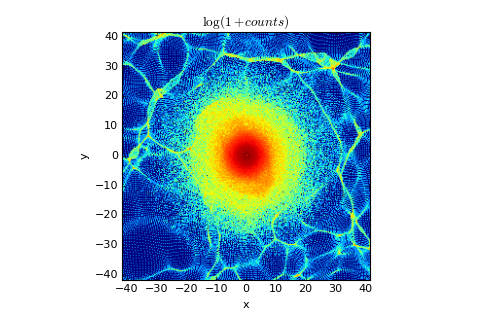

In [11]:
ds = vx.zeldovich(scale=100, t=1e1).concat(vx.example())
ds("x", "y").bounded_by_sigmas(square=True).gridded()

In [12]:
# TODO: exporting shuffled concatenated datasets is memory inefficient
ds.export_hdf5("concat.hdf5", column_names=["x", "y"], shuffle=True, selection=False)

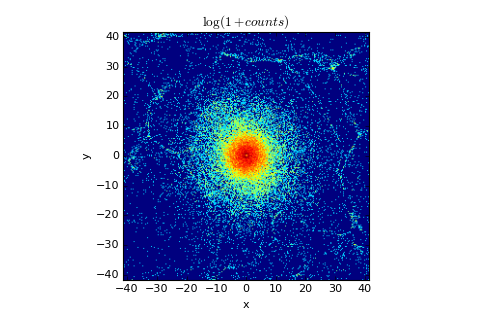

In [13]:
shuffled = vx.open("concat.hdf5")
xy = shuffled("x", "y")
shuffled.set_active_fraction(0.1)
limits = xy.limits_sigma()
xy.bounded_by(limits).gridded()